In [1]:
from pycollisiondb.pycollisiondb import PyCollision
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# The official ALADDIN2 server.
#DB_URL = 'https://db-amdis.org/aladdin2/'
# The official CollisionDB server.
DB_URL = 'https://db-amdis.org/collisiondb/'
# Local URL for whatever service is listening on port 8282.
#DB_URL = 'http://127.0.0.1:8282/'

In [3]:
# Fetch datasets from the server over the API.
# Proton-impact ionization of H.
query = {'reactants': ['H+', 'H 1s'],
         'process_types': ['HIN'],
         'data_type': 'cross section'}
pycoll = PyCollision.get_datasets(query=query, DB_URL=DB_URL)

# If you're accessing a locally-cached archive instead, do it here.
#DATA_DIR = '/Users/christian/www/colldb_results'
#archive_uuid = '026a7abd-5ed7-4e30-827d-f3f606f3fa98'
#pycoll = PyCollision.get_datasets(archive_uuid=archive_uuid, DATA_DIR=DATA_DIR)

In [4]:
# How many did we get?
len(pycoll.datasets)

5

In [5]:
# What are they (a dict, keyed by pk ID).
pycoll.datasets

{102737: D102737: H+ + H 1s → H+ + H+ + e-,
 107356: D107356: H+ + H 1s → H+ + H+ + e-,
 107760: D107760: H+ + H 1s → H+ + H+ + e-,
 103103: D103103: H 1s + H+ → H+ + H+ + e-,
 103104: D103104: H 1s + H+ → H+ + H+ + e-}

In [6]:
pycoll.summarize_datasets()

H+ + H 1s → H+ + H+ + e-
   qid: D102737
   process_types: ['HIN']
   data_type: cross section
   refs: {'B32': {'doi': '10.1016/j.adt.2019.05.002'}}
   qid: D107356
   process_types: ['HIN']
   data_type: cross section
   refs: {'B45': {'doi': '10.1140/epjd/e2019-100380-x'}}
   qid: D107760
   process_types: ['HIN']
   data_type: cross section
   refs: {'B50': {'note': 'IAEA-APID-4 (1993)'}}

H 1s + H+ → H+ + H+ + e-
   qid: D103103
   process_types: ['HIN']
   data_type: cross section
   refs: {'B33': {'doi': '10.1088/0022-3700/14/14/009'}}
   qid: D103104
   process_types: ['HIN']
   data_type: cross section
   refs: {'B34': {'doi': '10.1088/0022-3700/20/11/016'}}



In [7]:
pycoll.datasets[102737].x, pycoll.datasets[102737].y

(array([  1000.,   4000.,   9000.,  16000.,  25000.,  36000.,  49000.,
         64000.,  81000., 100000.]),
 array([5.471e-19, 1.960e-18, 1.235e-17, 4.050e-17, 9.192e-17, 1.405e-16,
        1.628e-16, 1.605e-16, 1.450e-16, 1.248e-16]))

In [9]:
print(pycoll.datasets[102737].print_values())

E / eV.u-1 sigma / cm2
1000.0 5.471e-19
4000.0 1.96e-18
9000.0 1.235e-17
16000.0 4.05e-17
25000.0 9.192e-17
36000.0 1.405e-16
49000.0 1.628e-16
64000.0 1.605e-16
81000.0 1.45e-16
100000.0 1.248e-16


In [10]:
# Resolve the references from the datasets into proper, citeable format.
# NB this accesses the pyref API.
pycoll.resolve_refs()
# e.g.
pycoll.refs

{'B32': {'authors': 'H. Agueny, J. Petter Hansen, A. Dubois, A. Makhoute, A. Taoutioui, N. Sisourat',
  'title': 'Electron capture, ionization and excitation cross sections for keV collisions between fully stripped ions and atomic hydrogen in ground and excited states',
  'journal': 'Atomic Data and Nuclear Data Tables',
  'volume': '129-130',
  'page_start': '101281',
  'page_end': '',
  'article_number': '101281',
  'year': 2019,
  'note': '',
  'doi': '10.1016/j.adt.2019.05.002',
  'bibcode': '2019ADNDT.12901281A',
  'url': 'https://dx.doi.org/10.1016/j.adt.2019.05.002'},
 'B33': {'authors': 'M. B Shah, H. B Gilbody',
  'title': 'Experimental study of the ionisation of atomic hydrogen by fast H<sup>+</sup>and He<sup>2+</sup>ions',
  'journal': 'Journal of Physics B: Atomic and Molecular Physics',
  'volume': '14',
  'page_start': '2361',
  'page_end': '2377',
  'article_number': '',
  'year': 1981,
  'note': '',
  'doi': '10.1088/0022-3700/14/14/009',
  'bibcode': '1981JPhB...14.236

In [11]:
pycoll.summarize_datasets()

H+ + H 1s → H+ + H+ + e-
   qid: D102737
   process_types: ['HIN']
   data_type: cross section
   refs: {'B32': {'doi': '10.1016/j.adt.2019.05.002'}}
   qid: D107356
   process_types: ['HIN']
   data_type: cross section
   refs: {'B45': {'doi': '10.1140/epjd/e2019-100380-x'}}
   qid: D107760
   process_types: ['HIN']
   data_type: cross section
   refs: {'B50': {'note': 'IAEA-APID-4 (1993)'}}

H 1s + H+ → H+ + H+ + e-
   qid: D103103
   process_types: ['HIN']
   data_type: cross section
   refs: {'B33': {'doi': '10.1088/0022-3700/14/14/009'}}
   qid: D103104
   process_types: ['HIN']
   data_type: cross section
   refs: {'B34': {'doi': '10.1088/0022-3700/20/11/016'}}



In [12]:
for ds in pycoll.datasets.values():
    print(ds.metadata['refs'])

{'B32': {'doi': '10.1016/j.adt.2019.05.002'}}
{'B45': {'doi': '10.1140/epjd/e2019-100380-x'}}
{'B50': {'note': 'IAEA-APID-4 (1993)'}}
{'B33': {'doi': '10.1088/0022-3700/14/14/009'}}
{'B34': {'doi': '10.1088/0022-3700/20/11/016'}}


In [13]:
pycoll.convert_units({'E': 'keV.u-1', 'sigma': 'a02'})

In [14]:
pycoll.datasets[102737].x

array([  1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.])

In [15]:
for ds in pycoll.datasets.values():
    ds.y *= 1.e16
    ds.unc_lo *= 1.e16
    ds.unc_hi *= 1.e16

<IPython.core.display.Javascript object>


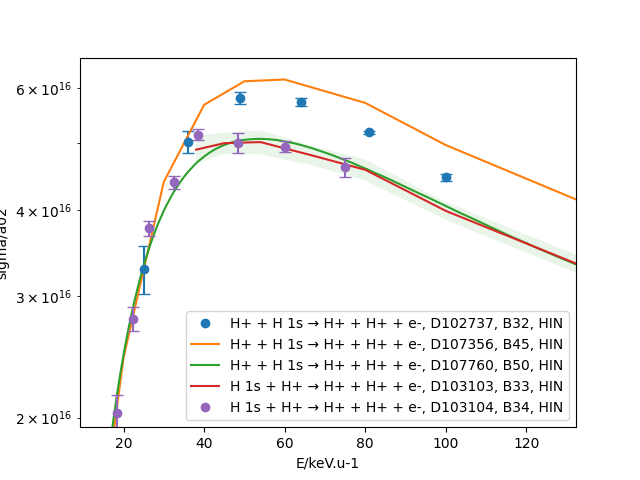

In [16]:
# Make a plot, indicating how the data should be labelled.
fig, ax = plt.subplots()
pycoll.plot_all_datasets(ax, label=('reaction', 'qid', 'refs', 'process_types'))
#pycoll.plot_all_datasets(ax, label=('qid', 'refs', 'process_types'))
plt.legend()

In [ ]:
%matplotlib inline
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 12})

In [ ]:
def get_label(ds):
    return ds.metadata['json_data']['method']
    #return list(ds.metadata['refs'].keys())[0]


fig, ax = plt.subplots(figsize=(6,4), dpi=300)
markers = {102737: 'o', 107356: 'v', 103103: 's', 103104: 'o'}
ls = {102737: '-', 107356: '-', 103103: 'none', 103104: 'none'}
colours = {102737: 'C0', 107356: 'C1', 103103: 'k', 103104: 'tab:red'}
mfc = {102737: 'none', 107356: 'C1', 103103: 'k', 103104: 'tab:red'}
label = {102737: 'CC, ref [Nicolas]', 107356: 'TC-BGM [Tom]',
          103103: 'Experiment [Shah 1981]', 103104: 'Experiment [Shah 1987]'}
for pk, ds in pycoll.datasets.items():
    yerr = (ds.unc_lo, ds.unc_hi)
    capsize = 4 if any(ds.unc_lo) else 0
    #ax.plot(ds.x, ds.y, marker=markers[pk], ls=ls[pk], label=get_label(ds))
    ax.errorbar(ds.x, ds.y, yerr, ls=ls[pk], marker=markers[pk], capsize=capsize,
                c=colours[pk], label=label[pk], ms=4, mfc=mfc[pk])
#pycoll.plot_all_datasets(ax, label=('method',))
ax.set_xlim(0, 150)
ax.set_ylim(0, 2)
ax.set_xlabel(r'$E\;/\mathrm{keV\,u^{-1}}$')
ax.set_ylabel(r'$\sigma\;/ 10^{-16} \;\mathrm{cm^{2}}$')

#handles, labels = ax.get_legend_handles_labels()
#for h in handles:
#    h.lines[0].set_linestyle("")
    #if h.lines[2]:
    #    h.lines[2][0].set_linestyle("")
#ax.legend(handles, labels)
plt.legend()
plt.tight_layout()
plt.savefig('p+H_HIN.pdf', dpi=300)

In [ ]:
plt.rcParams.keys()

In [ ]:
h.lines[2]

In [ ]:
ds.metadata

In [ ]:
line = ax.lines[1]
line.get_label()

In [ ]:
pycoll.datasets[103104].unc_lo